In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv("sample_submission.csv")
labels = pd.read_csv("train_labels.csv")

train

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
0,0,47,0,-0.196291,0.112395,1.000000,0.329204,-1.004660,-0.131638,-0.127505,0.368702,-0.1,-0.963873,-0.985069,0.531893,4.751492
1,0,47,1,-0.447450,0.134454,1.000000,-0.658407,0.162495,0.340314,-0.209472,-0.867176,0.2,-0.301301,0.082733,-0.231481,0.454390
2,0,47,2,0.326893,-0.694328,1.000000,0.330088,0.473678,1.280479,-0.094718,0.535878,1.4,1.002168,0.449221,-0.586420,-4.736147
3,0,47,3,0.523184,0.751050,1.000000,0.976991,-0.563287,-0.720269,0.793260,0.951145,-0.3,-0.995665,-0.434290,1.344650,0.429241
4,0,47,4,0.272025,1.074580,1.000000,-0.136283,0.398579,0.044877,0.560109,-0.541985,-0.9,1.055636,0.812631,0.123457,-0.223359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558075,25967,327,55,-0.282844,-1.217437,-1.666153,0.586726,-0.930698,-0.451010,-0.651184,0.368702,0.4,0.008671,-0.723536,-0.353909,-0.914749
1558076,25967,327,56,0.130603,0.349790,-1.666153,-0.324779,0.775324,-0.332835,0.099271,0.122137,-0.2,0.644509,0.691407,-0.613169,-0.515772
1558077,25967,327,57,-0.579598,0.429622,-1.666153,0.319469,0.308861,0.282723,-0.512750,0.012214,-1.6,-0.424133,0.716855,1.628601,0.928389
1558078,25967,327,58,1.278980,1.711134,-1.522820,0.802655,-0.460541,-0.055348,2.405282,0.043511,1.9,0.283960,-0.914914,0.364198,0.211424


In [3]:
train.describe()

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
count,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06
mean,1.298350e+04,3.316331e+02,2.950000e+01,4.365526e-04,-1.034982e-03,-2.178045e-01,-2.156555e-03,-1.828903e-03,-1.651785e-03,-4.122917e-04,-2.620665e-05,-1.298393e-04,1.365584e-03,3.315801e-04,-3.733291e-03,-1.172605e-02
std,7.496318e+03,1.958257e+02,1.731811e+01,2.658684e+00,4.404200e+00,2.298002e+00,3.934184e+00,1.683685e+00,1.590818e+00,3.345143e+00,3.243428e+00,4.501534e+00,2.592913e+00,1.917333e+00,4.532568e+00,3.911767e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,-3.750634e+02,-4.345977e+02,-3.165948e+01,-4.083761e+02,-2.362601e+01,-7.498280e+01,-4.705046e+02,-4.070115e+02,-5.361000e+02,-2.703468e+02,-4.341271e+01,-4.270586e+02,-6.125494e+02
25%,6.491750e+03,1.617500e+02,1.475000e+01,-5.000000e-01,-4.831933e-01,-6.461531e-01,-4.929204e-01,-4.729928e-01,-4.786836e-01,-4.927140e-01,-5.022901e-01,-5.000000e-01,-5.151734e-01,-4.787939e-01,-4.835391e-01,-5.805627e-01
50%,1.298350e+04,3.350000e+02,2.950000e+01,-3.091190e-03,3.151261e-03,0.000000e+00,0.000000e+00,-1.589577e-03,2.991773e-03,9.107468e-04,-2.290076e-03,0.000000e+00,-1.445087e-03,-1.655822e-03,3.086420e-03,0.000000e+00
75%,1.947525e+04,5.010000e+02,4.425000e+01,4.845440e-01,4.926471e-01,3.338469e-01,4.893805e-01,4.701565e-01,5.056096e-01,4.927140e-01,4.847328e-01,5.000000e-01,5.086705e-01,4.780386e-01,4.938272e-01,5.703325e-01
max,2.596700e+04,6.710000e+02,5.900000e+01,3.358246e+02,4.495914e+02,1.666667e+00,4.366504e+02,2.487286e+01,7.791548e+01,4.425009e+02,3.312542e+02,6.301000e+02,3.679812e+02,4.186559e+01,4.480206e+02,6.305111e+02


In [4]:
#check for missing data
train.isnull().sum(axis=0)

sequence     0
subject      0
step         0
sensor_00    0
sensor_01    0
sensor_02    0
sensor_03    0
sensor_04    0
sensor_05    0
sensor_06    0
sensor_07    0
sensor_08    0
sensor_09    0
sensor_10    0
sensor_11    0
sensor_12    0
dtype: int64

In [5]:
labels.head()

,sequence,state
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


In [6]:
train =train.merge(labels,how='left', on=["sequence"])
train.head()

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,state
0,0,47,0,-0.196291,0.112395,1.0,0.329204,-1.004660,-0.131638,-0.127505,0.368702,-0.1,-0.963873,-0.985069,0.531893,4.751492,0
1,0,47,1,-0.447450,0.134454,1.0,-0.658407,0.162495,0.340314,-0.209472,-0.867176,0.2,-0.301301,0.082733,-0.231481,0.454390,0
2,0,47,2,0.326893,-0.694328,1.0,0.330088,0.473678,1.280479,-0.094718,0.535878,1.4,1.002168,0.449221,-0.586420,-4.736147,0
3,0,47,3,0.523184,0.751050,1.0,0.976991,-0.563287,-0.720269,0.793260,0.951145,-0.3,-0.995665,-0.434290,1.344650,0.429241,0
4,0,47,4,0.272025,1.074580,1.0,-0.136283,0.398579,0.044877,0.560109,-0.541985,-0.9,1.055636,0.812631,0.123457,-0.223359,0


Text(0.5, 1.0, 'Correlation Heatmap for Train dataset')

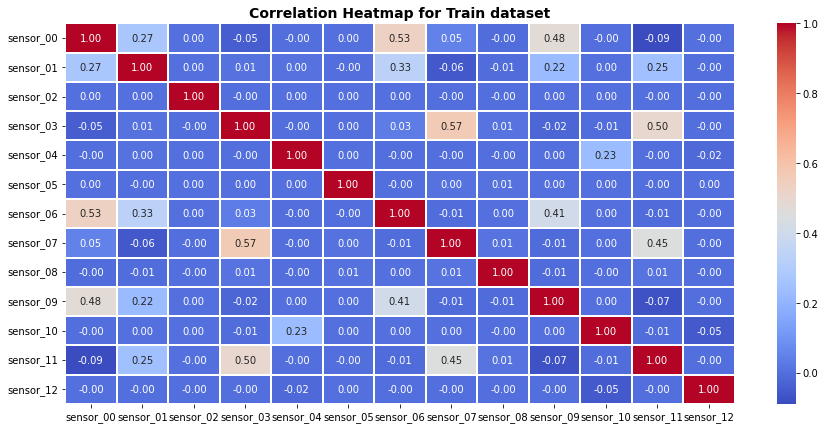

In [7]:
#use a heatmap to calculate correlation
# set the size of the map
features  = [col for col in test.columns if col not in ("sequence","step","subject")]
plt.figure(figsize = (15,7))

hm = sns.heatmap(train[features].corr(),    # data
                cmap = 'coolwarm',# style
                annot = True,     # True to show the specific values
                fmt = '.2f',      # set the precision
                linewidths = 0.05)
plt.title('Correlation Heatmap for Train dataset', 
              fontsize=14, 
              fontweight='bold')

Text(0.5, 1.0, 'Correlation Heatmap for Selected columns from Train dataset')

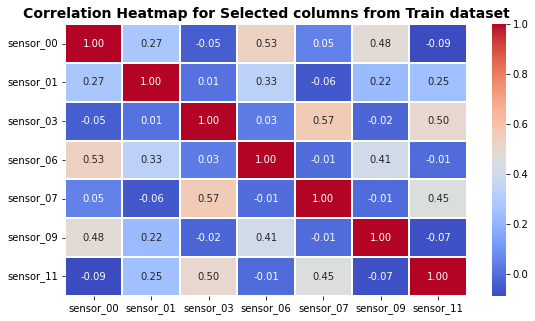

In [8]:
col_t=["sensor_00","sensor_01","sensor_03","sensor_06","sensor_07","sensor_09","sensor_11"]

# set the size of the map
plt.figure(figsize = (9,5))

hm = sns.heatmap(train[col_t].corr(),    # data
                cmap = 'coolwarm',      
                annot = True,     
                fmt = '.2f', 
                linewidths = 0.05)
plt.title('Correlation Heatmap for Selected columns from Train dataset', 
              fontsize=14, 
              fontweight='bold')

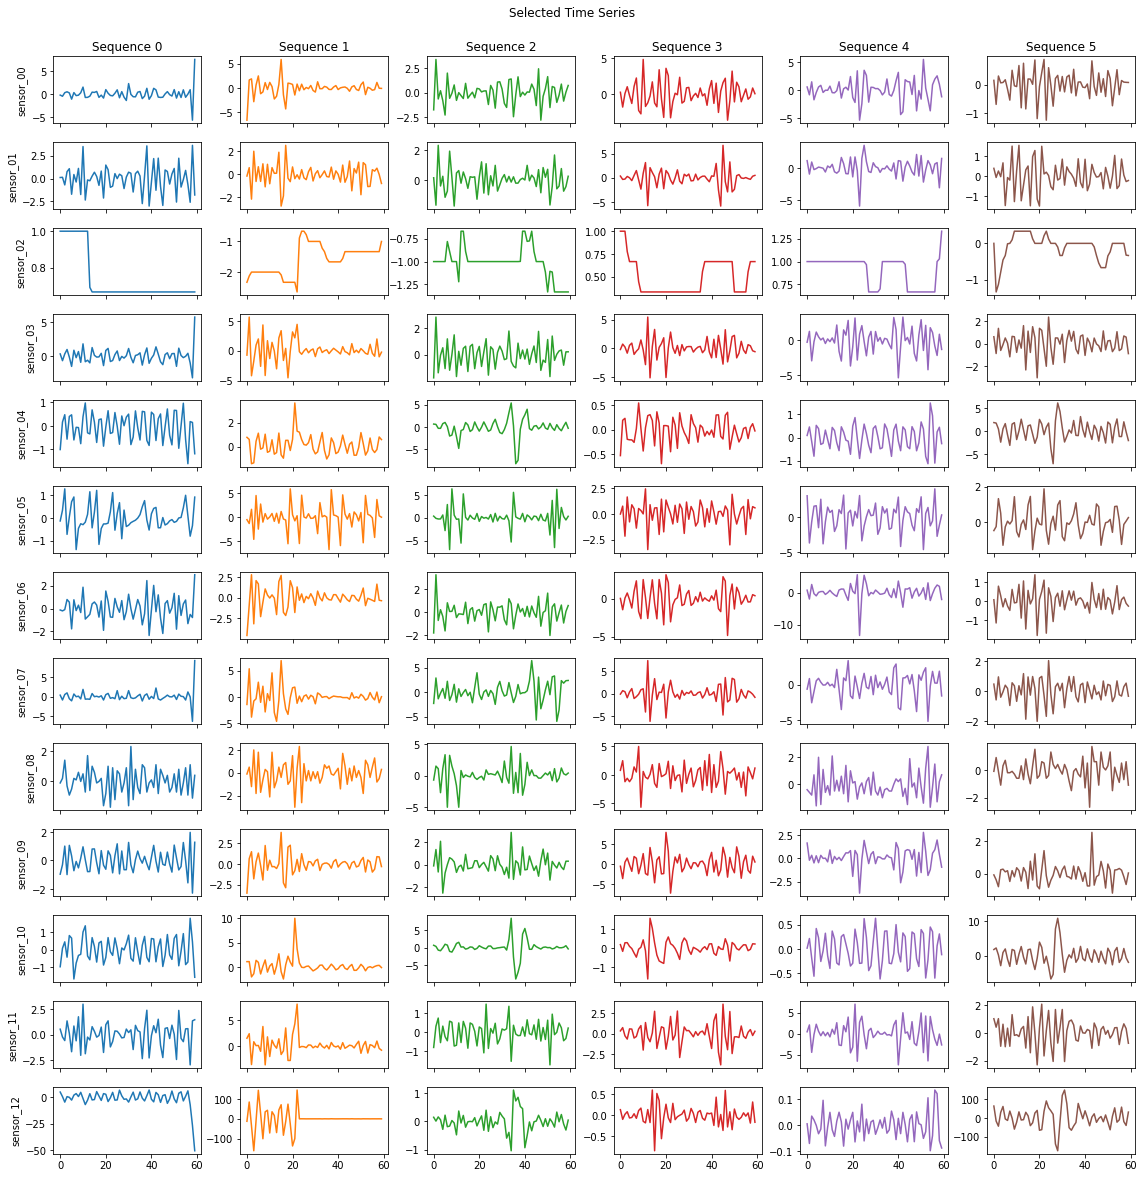

In [9]:
#sensor data
sequences = [0, 1, 2, 3, 4, 5]
figure, axes = plt.subplots(13, len(sequences), sharex=True, figsize=(16, 16))
for i, sequence in enumerate(sequences):
    for sensor in range(13):
        sensor_name = f"sensor_{sensor:02d}"
        plt.subplot(13, len(sequences), sensor * len(sequences) + i + 1)
        plt.plot(range(60), train[train.sequence == sequence][sensor_name],
                color=plt.rcParams['axes.prop_cycle'].by_key()['color'][i % 10])
        if sensor == 0: plt.title(f"Sequence {sequence}")
        if sequence == sequences[0]: plt.ylabel(sensor_name)
figure.tight_layout(w_pad=0.1)
plt.suptitle('Selected Time Series', y=1.02)
plt.show()

In [10]:
def aggregated_features(df, aggregation_cols = ['sequence'], prefix = ''):
    agg_strategy = {'sensor_00': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_01': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_02': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_03': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_04': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_05': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_06': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_07': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_08': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_09': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_10': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_11': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_12': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                   }
    group = df.groupby(aggregation_cols).aggregate(agg_strategy)
    group.columns = ['_'.join(col).strip() for col in group.columns]
    group.columns = [str(prefix) + str(col) for col in group.columns]
    group.reset_index(inplace = True)
    
    temp = (df.groupby(aggregation_cols).size().reset_index(name = str(prefix) + 'size'))
    group = pd.merge(temp, group, how = 'left', on = aggregation_cols,)
    return group

In [11]:
train_merge_data = aggregated_features(train, aggregation_cols = ['sequence', 'subject'])
test_merge_data = aggregated_features(test, aggregation_cols = ['sequence', 'subject'])

In [12]:
train_subjects_merge_data = aggregated_features(train, aggregation_cols = ['subject'], prefix = 'subject_')
test_subjects_merge_data = aggregated_features(test, aggregation_cols = ['subject'], prefix = 'subject_')

In [13]:
train_subjects_merge_data.head()

,subject,subject_size,subject_sensor_00_mean,subject_sensor_00_max,subject_sensor_00_min,subject_sensor_00_var,subject_sensor_00_mad,subject_sensor_00_sum,subject_sensor_00_median,subject_sensor_01_mean,...,subject_sensor_11_mad,subject_sensor_11_sum,subject_sensor_11_median,subject_sensor_12_mean,subject_sensor_12_max,subject_sensor_12_min,subject_sensor_12_var,subject_sensor_12_mad,subject_sensor_12_sum,subject_sensor_12_median
0,0,1200,0.001058,3.936631,-4.695518,0.579405,0.524290,1.269706,0.003864,-0.000478,...,0.445067,-3.368313,-0.011831,-0.007687,1.536232,-7.801790,0.371089,0.459001,-9.224211,0.007886
1,1,10500,-0.002550,35.463679,-34.591963,1.546208,0.745773,-26.778980,0.002318,-0.014114,...,0.731817,42.049383,-0.014403,-0.107664,328.472293,-293.231458,4107.284790,50.113950,-1130.476130,0.505754
2,2,2280,0.010308,6.453632,-6.898764,1.465470,0.813444,23.503091,-0.023570,-0.008271,...,0.539252,-19.794239,0.001543,-0.590029,416.050298,-425.902387,23282.308252,126.422564,-1345.265985,-3.700128
3,3,2160,-0.004428,5.753478,-8.153787,0.846161,0.601889,-9.564915,-0.002318,-0.000313,...,0.489554,-2.666667,0.017490,0.000702,1.424552,-1.623615,0.006993,0.044377,1.516624,0.000426
4,4,1560,0.008160,5.770479,-4.090417,0.565596,0.531483,12.729521,-0.008501,0.003920,...,0.614274,5.048354,0.036523,-0.002236,1.789003,-2.025149,0.131529,0.234263,-3.488917,-0.023018


In [14]:
#lagging
train['sensor_00_lag_01'] = train['sensor_00'].shift(1)
train['sensor_00_lag_10'] = train['sensor_00'].shift(10)
train.head(15)

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,state,sensor_00_lag_01,sensor_00_lag_10
0,0,47,0,-0.196291,0.112395,1.000000,0.329204,-1.004660,-0.131638,-0.127505,0.368702,-0.1,-0.963873,-0.985069,0.531893,4.751492,0,NaN,NaN
1,0,47,1,-0.447450,0.134454,1.000000,-0.658407,0.162495,0.340314,-0.209472,-0.867176,0.2,-0.301301,0.082733,-0.231481,0.454390,0,-0.196291,NaN
2,0,47,2,0.326893,-0.694328,1.000000,0.330088,0.473678,1.280479,-0.094718,0.535878,1.4,1.002168,0.449221,-0.586420,-4.736147,0,-0.447450,NaN
3,0,47,3,0.523184,0.751050,1.000000,0.976991,-0.563287,-0.720269,0.793260,0.951145,-0.3,-0.995665,-0.434290,1.344650,0.429241,0,0.326893,NaN
4,0,47,4,0.272025,1.074580,1.000000,-0.136283,0.398579,0.044877,0.560109,-0.541985,-0.9,1.055636,0.812631,0.123457,-0.223359,0,0.523184,NaN
5,0,47,5,-1.073416,-1.714286,1.000000,-1.492920,0.469736,0.713538,-1.792350,-1.082443,-0.5,0.314306,0.664594,-1.682099,-2.838448,0,0.272025,NaN
6,0,47,6,0.350850,0.439076,1.000000,0.870796,-0.596964,0.923710,0.769581,0.666412,0.2,-0.723266,-1.691552,0.842593,1.849531,0,-1.073416,NaN
7,0,47,7,-0.304482,-0.379202,1.000000,-0.218584,-0.059983,-1.389678,-0.182149,-0.029771,0.1,-0.070809,-0.774024,-0.612140,3.300938,0,0.350850,NaN
8,0,47,8,-0.216383,1.106092,1.000000,0.677876,-0.071718,-0.456993,0.296903,0.111450,0.6,-0.525289,-0.334069,1.751029,0.515772,0,-0.304482,NaN
9,0,47,9,0.303709,-1.744748,1.000000,-0.896460,-0.755221,-0.254301,-0.354281,-0.591603,0.0,0.151012,-0.268359,-2.033951,4.509378,0,-0.216383,NaN


In [16]:
#merging before training
train_merge_data = train_merge_data.merge(labels, how = 'left', on = 'sequence')

In [17]:
train_merge_data = train_merge_data.merge(train_subjects_merge_data, how = 'left', on = 'subject')
test_merge_data = test_merge_data.merge(test_subjects_merge_data, how = 'left', on = 'subject')
train_merge_data.head()

,sequence,subject,size,sensor_00_mean,sensor_00_max,sensor_00_min,sensor_00_var,sensor_00_mad,sensor_00_sum,sensor_00_median,...,subject_sensor_11_mad,subject_sensor_11_sum,subject_sensor_11_median,subject_sensor_12_mean,subject_sensor_12_max,subject_sensor_12_min,subject_sensor_12_var,subject_sensor_12_mad,subject_sensor_12_sum,subject_sensor_12_median
0,0,47,60,0.041744,7.534003,-5.634467,2.049649,0.829612,2.504637,-0.148764,...,1.382194,-206.570988,0.022634,-0.078774,213.832481,-312.621910,411.832698,12.579934,-491.551151,-0.254476
1,1,66,60,-0.069294,5.870943,-6.657651,2.540538,0.964271,-4.157651,-0.031298,...,1.292805,42.286008,0.034465,-0.707871,268.698210,-317.453112,2151.151810,21.210487,-1189.222933,-0.006181
2,2,66,60,-0.001546,3.402628,-2.797527,1.316816,0.855307,-0.092736,0.058733,...,1.292805,42.286008,0.034465,-0.707871,268.698210,-317.453112,2151.151810,21.210487,-1189.222933,-0.006181
3,3,542,60,0.029869,4.856260,-3.643740,3.131857,1.379164,1.792117,-0.119784,...,1.031835,16.807613,0.023663,0.001263,3.487639,-3.136829,0.284165,0.349181,6.289855,-0.012788
4,4,437,60,0.059132,5.455951,-5.331530,4.059335,1.495183,3.547913,0.005410,...,2.638035,329.658436,0.006173,0.000280,2.629156,-2.805200,0.101305,0.216635,3.347826,0.003410


In [18]:
test_merge_data.head()

,sequence,subject,size,sensor_00_mean,sensor_00_max,sensor_00_min,sensor_00_var,sensor_00_mad,sensor_00_sum,sensor_00_median,...,subject_sensor_11_mad,subject_sensor_11_sum,subject_sensor_11_median,subject_sensor_12_mean,subject_sensor_12_max,subject_sensor_12_min,subject_sensor_12_var,subject_sensor_12_mad,subject_sensor_12_sum,subject_sensor_12_median
0,25968,684,60,-0.002602,3.146832,-4.950541,1.191898,0.732741,-0.156105,-0.002318,...,0.850266,-15.966049,0.012346,-0.001973,2.274936,-3.095055,0.128112,0.257374,-8.288150,-0.001705
1,25969,935,60,0.028516,5.816074,-3.675425,2.102617,0.848916,1.710974,-0.015842,...,0.769165,-12.937243,0.005144,-0.002083,2.197357,-2.149616,0.444153,0.540439,-7.374680,-0.044970
2,25970,924,60,0.057664,12.306028,-15.005410,25.843168,4.023308,3.459815,1.079212,...,3.311826,-101.524691,-0.010802,-0.308142,253.685422,-182.180307,2106.566889,34.328376,-702.563512,-1.936275
3,25971,769,60,-0.004791,2.876352,-2.465997,0.837073,0.687991,-0.287481,-0.033617,...,0.516179,10.443416,-0.002058,-0.001365,19.086957,-17.872975,1.103406,0.666881,-5.732310,-0.070546
4,25972,764,60,-0.001443,17.295209,-9.974498,7.748900,1.083572,-0.086553,-0.171947,...,1.233048,-144.852881,-0.005144,-0.002999,436.830350,-518.899403,17067.111823,106.631204,-8.815857,12.570546


In [27]:
#post process info for the model
ignore = ['sequence', 'state', 'subject']
features = [feat for feat in train_merge_data.columns if feat not in ignore]
target_feature = 'state'